This is this fourth in a series of notebooks designed to show you how to analyze social media data. For demonstration purposes we are looking at tweets sent by CSR-related Twitter accounts -- accounts related to ethics, equality, the environment, etc. -- of Fortune 200 firms in 2013. We assume you have already downloaded the data and have completed the steps taken in <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%201%20-%20Import%20Data%2C%20Select%20Cases%20and%20Variables%2C%20Save%20DataFrame.ipynb" target="_blank">Chapter 1</a>,  <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%202%20-%20Aggregating%20and%20Analyzing%20Data%20by%20Twitter%20Account.ipynb" target="_blank">Chapter 2</a>, and  <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%203%20-%20Analyzing%20Twitter%20Data%20by%20Time%20Period.ipynb" target="_blank">Chapter 3</a>. In this fourth notebook I will show you how to conduct various analyses of the hashtags included in Twitter data; specifically, we'll cover how to create and graph counts of the most frequently used hashtags and create several different tag clouds. 

# Chapter 4: Analyzing Hashtags

First, we will import several necessary Python packages and set some options for viewing the data. As with prior chapters, we will be using the <a href="http://pandas.pydata.org/">Python Data Analysis Library,</a> or <i>PANDAS</i>, extensively for our data manipulations.

### Import packages and set viewing options

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [2]:
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)

I'm using version 0.16.2 of PANDAS

In [3]:
pd.__version__

'0.16.2'

#### Import graphing packages

We'll be producing some figures at the end of this tutorial so we need to import various graphing capabilities. The default Matplotlib library is solid. 

In [4]:
import matplotlib
print matplotlib.__version__

1.4.3


In [5]:
import matplotlib.pyplot as plt

In [6]:
#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*

One of the great innovations of ipython notebook is the ability to see output and graphics "inline," that is, on the same page and immediately below each line of code. To enable this feature for graphics we run the following line.

In [7]:
%matplotlib inline  

We will be using <i>Seaborn</i> to help pretty up the default Matplotlib graphics. Seaborn does not come installed with Anaconda Python so you will have to open up a terminal and run <i>pip install seaborn</i>.

In [8]:
import seaborn as sns
print sns.__version__

0.6.0


<br>The following line will set the default plots to be bigger.

In [9]:
plt.rcParams['figure.figsize'] = (15, 5)

### Read in data

In <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%201%20-%20Import%20Data%2C%20Select%20Cases%20and%20Variables%2C%20Save%20DataFrame.ipynb" target="_blank">Chapter 1</a> we deleted tweets from one unneeded Twitter account and also omitted several unnecessary columns (variables). We then saved, or "pickled," the updated dataframe. Let's now open this saved file. As we can see in the operations below this dataframe contains 54 variables for 32,330 tweets.

In [10]:
df = pd.read_pickle('CSR tweets - 2013 by 41 accounts.pkl')
print len(df)

32330


<br>For our analyses we will look at all <i>original</i> tweets -- those that are not retweets. This will allow us to see more clearly what the organizations choose to include in their own tweets. Here we will rely on the <i>retweeted_status</i> column in our dataframe. This is a variable I created in the code we have used to download the tweets. The value will be "THIS IS A RETWEET" if the tweet is not original and blank otherwise. We'll use this to create a new version of our dataframe, called <i>df_original</i>, that will comprise all rows in <i>df</i> where the value of <i>retweeted_status</i> does not equal (as indicated by `!=` )"THIS IS A RETWEET." We can see that our new dataframe has 26,257 tweets -- meaning 6,073 of the 32,330 tweets were retweets.

In [11]:
df_original = df[df['retweeted_status']!='THIS IS A RETWEET']
print len(df_original)
print len(df)-len(df_original)
df_original.head(2)

26257
6073


,rowid,query,tweet_id_str,inserted_date,language,coordinates,retweeted_status,created_at,month,year,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_favourites_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,favorite_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic,num_characters,num_words,retweeted_user,retweeted_user_description,retweeted_user_screen_name,retweeted_user_followers_count,retweeted_user_listed_count,retweeted_user_statuses_count,retweeted_user_location,retweeted_tweet_created_at,Fortune_2012_rank,Company,CSR_sustainability,specific_project_initiative_area
0,67340,humanavitality,306897327585652736,2014-03-09 13:46:50.222857,en,NaN,NaN,2013-02-27 22:43:19.000000,2,2013,@louloushive (Tweet 2) We encourage other empl...,humanavitality,274041023,2859,440,38,25,1766,This is the official Twitter account for Human...,NaN,Tue Mar 29 16:23:02 +0000 2011,0,0,NaN,0,NaN,0,louloushive,1,louloushive,3.062183e+17,web,NaN,NaN,NaN,NaN,NaN,0,0,0,121,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,Humana,0,1
1,39454,FundacionPfizer,308616393706844160,2014-03-09 13:38:20.679967,es,NaN,NaN,2013-03-04 16:34:17.000000,3,2013,¿Sabes por qué la #vacuna contra la #neumonía ...,FundacionPfizer,188384056,2464,597,50,11,2400,Noticias sobre Responsabilidad Social y Fundac...,México,Wed Sep 08 16:14:11 +0000 2010,1,0,NaN,0,"vacuna, neumonía",2,NaN,0,NaN,NaN,web,NaN,NaN,NaN,NaN,NaN,0,0,0,138,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,Pfizer,0,1


#### Save new dataframe

In [12]:
df_original.to_pickle('Original 2013 CSR Tweets.pkl')

### Describe Number of Hashtags Used 

We have two hashtag variables in our dataframe: `entities_hashtags` and `entities_hashtag_counts`. We created the first from the `hashtags` dictionary included in the Twitter API output, and created the second by counting the number of elements in the first variable. So, we have a count of the number of hashtags included in each of our 26,257 tweets. A good first thing to do is to get the summary or descriptive statistics for this variable. We see that the mean and standard deviation are both just over 1 hashtag, and that the maximum number included in any one tweet is 9. 

In [13]:
df_original['entities_hashtags_count'].describe()

count    26257.000000
mean         1.011349
std          1.012502
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: entities_hashtags_count, dtype: float64

<br>Another useful thing to do is look at the frequencies. We do that in PANDAS with `value_counts()`. This gives us the distribution for the variable.

In [14]:
df_original['entities_hashtags_count'].value_counts()

0    9758
1    9198
2    5167
3    1646
4     386
5      80
6      16
7       4
9       1
8       1
dtype: int64

<br>Let's plot it out. Notice that we can just directly plot the value_counts(). No need to create another variable or a new dataframe. We see that most tweets include 0 or 1 hashtags. Very few have more than 3.

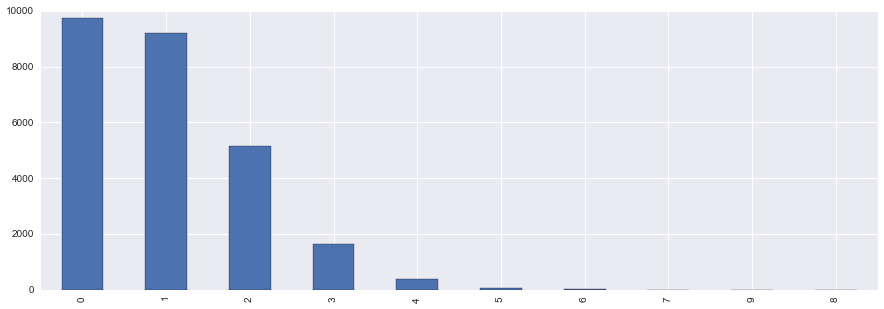

In [15]:
df_original['entities_hashtags_count'].value_counts().plot(kind='bar')

## Count Frequencies for Specific Hashtags

Now let's see which hashtags are employed most frequently in our dataset. Now we're doing something more complicated. We have to put all the hashtags together somehow and generate a count for each one. You'll find that in Python there are a number of different ways of accomplishing any given task. I'll introduce you to a few ways here. Don't try to learn them all at once; rather, keep adding new tools to your knowledge base one at a time. 

First we'll do a `for loop` over each tweet in our dataframe. I won't go into extended detail here, but follow the links to learn more on codecademy. As an aside, I have recommended to all those who are beginners to Python have looked through my <a href="http://social-metrics.org/tutorial-list/" target="_blank">introductory tutorials on how to download Twitter data</a> as well as go through the 13-hour beginner Python course on <a href="https://www.codecademy.com/tracks/python" target=_"blank">codecademy</a>. If you do so you will have much more success at understanding what is happening in these tutorials. And remember, be patient -- your understanding will keep growing but it's a step-by-step process. 

`For loops` are invaluable for easily iterating over rows to generate new views of your data or create new variables.     
What we are going to do is to loop over every tweet and add each hashtag to a new list, which we'll call `hashtag_list`.  Recall that our `entities_hashtag` column contains entries like this (a string listing all the tags included in the tweet):

In [68]:
df_original['entities_hashtags'].head()

0                        NaN
1           vacuna, neumonía
2                    lazos13
3    IntelSTS, WHScienceFair
4                    CGI2013
Name: entities_hashtags, dtype: object

<br>So, what we are doing in the following code block is saying, let's loop over each `entities_hashtags` cell in our dataframe. If the cell is not empty (`pd.notnull(i)`), then we will take that list of tags, split it up into its individual hashtags, make a few formatting changes to it and, finally, with the `lower()` command, make it lowercase and add it to our list. The reason for making it lowercase is to render our ultimate counts case-insensitive (Twitter users are not known for their consistency in capitalization). 

In [47]:
hashtag_list = []                          #CREATE EMPTY LIST 
for i in df_original.entities_hashtags:    #LOOP OVER EVERY CELL IN ENTITIES_HASHTAGS
    if pd.notnull(i):                      #IF CELL NOT EMPTY
        tags = i.split()                   #SPLIT EACH CELL INTO SEPARATE HASHTAGS
        for t in tags:                     #FOR EACH TAG IN THE CELL
            t = "#"+t                      #ADD '#' SYMBOL TO BEGINNING OF EACH TAG
            t = t.replace(',', '')         #REMOVE COMMAS FROM END OF TAGS
            t = t.lower()                  #MAKE TAG LOWER CASE
            hashtag_list.append(t)         #ADD TAG TO OUR LIST
print len(hashtag_list)                    #PRINT NUMBER OF ITEMS IN OUR LIST
hashtag_list                               #SHOW THE LIST

26555


['#vacuna',
 '#neumon\xc3\xada',
 '#lazos13',
 '#intelsts',
 '#whsciencefair',
 '#cgi2013',
 '#cleanenergy',
 '#montpellier',
 '#smartercities',
 '#ff',
 '#hungrykate',
 '#piday',
 '#legacyofgood',
 '#dsic13',
 '#bigdata',
 '#digitaldelta',
 '#smartcityexpo',
 '#iot',
 '#stem',
 '#womenweb',
 '#worldtoiletday',
 '#fortunegreen',
 '#helpbridge',
 '#ioe',
 '#iot',
 '#newyearsresolution',
 '#intelsts',
 '#innovation',
 '#mhealth',
 '#telepresence',
 '#memorialday',
 '#osc',
 '#csr',
 '#wintitwednesday',
 '#education',
 '#tech',
 '#genx',
 '#fuel',
 '#efficiency',
 '#cisco',
 '#networking',
 '#academy',
 '#fb',
 '#netacad',
 '#netacad500k',
 '#menopausia',
 '#dc',
 '#lraa',
 '#ne',
 '#walmart',
 '#winitwednesday',
 '#work',
 '#ethanol',
 '#rfs',
 '#walmartdc',
 '#smartercities',
 '#china',
 '#awesome',
 '#edtechchat',
 '#pbsdlday',
 '#inventosmexicanos',
 '#stem',
 '#walmart',
 '#health',
 '#lives',
 '#vzappchallenge',
 '#internetessentials',
 '#stem',
 '#infographic',
 '#impactx',
 '#ata2

<br>Now I'll show you a second way of doing this. In the code above we are relying on the `entities_hashtags` column, which contains a list of all the tags included in the tweet. The Twitter API separates the hashtags out for us already, so in our downloading of the data we took advantage of this and created our variable `entities_hashtags`. But what if you are looking for tags in another script that didn't take advantage of this? Or maybe you are looking for tags prepended with some other symbol (such as the "cashtag" symbol `$`, e.g., `$GOOG`)? Well, Python has ways of dealing with that as well. 

The code below loops over the `content` cell -- the cell containing the content of each tweet. It first splits each tweet into distinctive words using the `.split()` function then find words that start with `"#"` using Python's `.startswith()` function. It then removes certain punctuation marks and makes each hashtag lowercase. It then adds the hashtags found in each tweet to `hashtag_list` using Python's `extend()` function. 

We can see that there are 140 fewer tags in this list (26,415 instead of 26,555). The lesson is that it's best to rely on the API -- in this case, using Twitter's own hashtag data -- than creating your own. But in the bigger picture there is no substantive difference between the two lists.

In [48]:
hashtag_list_v2 = []     #CREATE EMPTY LIST 
for i in df_original.content:           #LOOP OVER ITEMS IN 'S'
    hashtag = filter(lambda x: x.startswith('#'),i.split()) 
    hashtag = map(lambda x: x.strip('/;,-.:!?"''()'),hashtag)  ##remove the indicated punctuations
    hashtag = map(lambda x: x.strip(),hashtag)    #STRIP REMOVES 
    hashtag = map(lambda x: x.lower(),hashtag)    #IF WE WANT LOWER CASE TAGS (OTHERWISE, COUNT IS CASE SENSITIVE)
    hashtag_list_v2.extend(hashtag)  
print len(hashtag_list_v2)
hashtag_list_v2

26415


['#vacuna',
 '#neumon\xc3\xada',
 '#lazos13',
 '#intelsts',
 '#whsciencefair',
 '#cgi2013',
 '#cleanenergy',
 '#montpellier',
 '#smartercities',
 '#ff',
 '#hungrykate',
 '#piday',
 '#legacyofgood',
 '#dsic13',
 '#bigdata',
 '#digitaldelta',
 '#smartcityexpo',
 '#iot',
 '#stem',
 '#womenweb',
 '#worldtoiletday',
 '#fortunegreen',
 '#helpbridge',
 '#ioe',
 '#iot',
 '#newyearsresolution',
 '#intelsts',
 '#innovation',
 '#mhealth',
 '#telepresence',
 '#memorialday',
 '#osc',
 '#csr',
 '#wintitwednesday',
 '#education',
 '#tech',
 '#genx',
 '#fuel',
 '#efficiency',
 '#cisco',
 '#networking',
 '#academy',
 '#fb',
 '#netacad',
 '#netacad500k',
 '#menopausia',
 '#dc',
 '#lraa',
 '#ne',
 '#walmart',
 '#winitwednesday',
 '#work',
 '#ethanol',
 '#rfs',
 '#walmartdc',
 '#smartercities',
 '#china',
 '#awesome',
 '#edtechchat',
 '#pbsdlday',
 '#inventosmexicanos',
 '#stem',
 '#walmart',
 '#health',
 '#lives',
 '#vzappchallenge',
 '#internetessentials',
 '#stem',
 '#infographic',
 '#impactx',
 '#ata2

<br>OK, we now have our list (let's use our first version here). Every hashtag in our dataset is included in this list. It has 26,555 elements (hashtags). Now how can we get a count for each hashtag? By using `value_counts()` !  We can perform pure Python operations on this list, but in order to use the `value_counts()` function, which is a PANDAS feature, we need to first convert it to a PANDAS Series object. In the code below we thus convert the list to a PANDAS series and then run `value_counts()`.

In [70]:
Series(hashtag_list).value_counts()

#stem                        932
#csr                         708
#smartercities               586
#edtech                      439
#youthspark                  412
#education                   348
#bigdata                     283
#girlrising                  276
#impactx                     276
#walmart                     272
#ioe                         236
#sustainability              230
#domoreedu                   225
#ff                          215
#energy                      201
#foodsafety                  185
#winitwednesday              168
#edchat                      166
#yourvoicecounts             164
#intelforchange              156
#wmtgreen                    149
#tech                        141
#3m                          135
#vzappchallenge              130
#lraa                        119
#veterans                    116
#solar                       113
#dv                          112
#ciscoeduforum               108
#edtechchat                  108
          

<br>We can then easily convert this into a dataframe (dataset). We see there are 3,400 rows. That is, the companies used 3,400 different hashtags in total in the 26,257 original tweets they sent in 2013. 

In [53]:
cnt_hashtags = DataFrame(Series(hashtag_list).value_counts())  
cnt_hashtags.columns = ['tag_frequency']                       #GIVE A NAME TO THE COLUMN
print len(cnt_hashtags)
cnt_hashtags

3400


,tag_frequency
#stem,932
#csr,708
#smartercities,586
#edtech,439
#youthspark,412
#education,348
#bigdata,283
#girlrising,276
#impactx,276
#walmart,272


<br>A third method is to rely on a function. Functions are great and can save a lot of time. I don't use them as frequently as I should. The function below is one I modified from something written by my friend <a href="http://www.sunyit.edu/apps/directory/?mode=getdetails&uid=ndayisj" target="_blank">Jerome Niyirora</a> for a paper we worked on together (forthcoming at <i>Advances in Social Work</i>).

For this function we'll build off the `_v2` version of our loop above. Here's what the function does. First, it creates an empty list, `hashtag_list`. Then it will loop over the (as yet unspecified) `'s'` (which will be the `content` cell of each tweet). It splits each tweet into distinctive words using the `.split()` function then find words that start with `#` using Python's `.startswith()` function. It then removes certain punctuation marks and makes each hashtag lowercase. It then add the hashtags found in each tweet to `hashtag_list` using Python's `extend()` function. Finally, it uses PANDAS to generate the `value_counts()` as we did above in our list comprehension approach. The function ends by returning a PANDAS DataFrame containing a frequency count for each hashtag.

In [50]:
def count_hashtags(s):
    hashtag_list_v3 = []     #CREATE EMPTY LIST 
    for i in s:           #LOOP OVER ITEMS IN 'S'
        hashtag = filter(lambda x: x.startswith('#'),i.split()) 
        hashtag = map(lambda x: x.strip('/;,-.:!?"''()'),hashtag)  ##remove the indicated punctuations
        hashtag = map(lambda x: x.strip(),hashtag)    #STRIP REMOVES 
        hashtag = map(lambda x: x.lower(),hashtag)    #IF WE WANT LOWER CASE TAGS (OTHERWISE, COUNT IS CASE SENSITIVE)
        hashtag_list_v3.extend(hashtag)  
    return DataFrame(Series(hashtag_list_v3).value_counts())

<br>In the following line we invoke our function; specifically, we're applying our function on the `content` column of our dataframe (that column hence takes the role of the previously undefined `s` in the above function, and each `i` is a cell containing the content of a tweet). Note that our use of `i` and `s` is completely arbitrary. We could have used any word or letter.  

Note that I have chosen to look at the `content` column here rather than the `entities_hashtags`  column. The only good reason for doing this is to show you the `split()`  function, and how it can be used to separate a block of text, as well as the `startswith()`  function, which is used to grab only those words that start with `#`. You'll find that Python has an extremely powerful set of tools for parsing text. 

Side note: The beauty of a functional approach is that it could be re-applied -- with one line of code -- to another column. In our case here, of all the three methods, I would tend to use the first method -- creating a for loop over the `entities_hasthags` -- rather than employing the functional approach. But your workflow may end up being different and I'd encourage you to get used to writing and using and reusing functions.

In [54]:
count_hashtags(df_original.content)  #INVOKE FUNCTION AND PROVIDE NAME TO DATAFRAME

,0
#stem,917
#csr,704
#smartercities,582
#edtech,438
#youthspark,404
#education,341
#bigdata,281
#impactx,275
#girlrising,272
#walmart,241


<br>Let's export a copy of the frequencies to a CSV file.

In [55]:
cnt_hashtags.to_csv('count_hashtags.csv') ## export the results

### Plot most popular hashtags

A quick look at the above frequencies tables suggests that the distribution likely approximates a <i>power law</i> distribution rather than a normal distribution. There will thus be many tags that are used a single time and a relatively small number that are used a lot. First let's take a look at what we see in a plot of all tags.

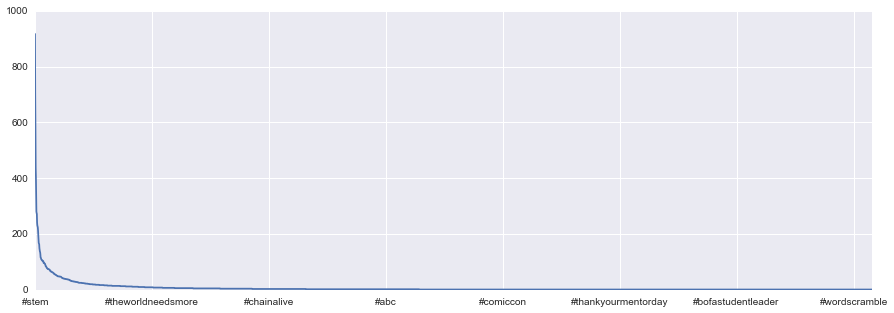

In [404]:
cnt_hashtags['tag_frequency'].plot()

<br>That looks a lot like a power law distribution rather than what we'd see with a normal distribution (bell curve). To more precisely see what the distribution looks like we can generate a <i>histogram</i>.

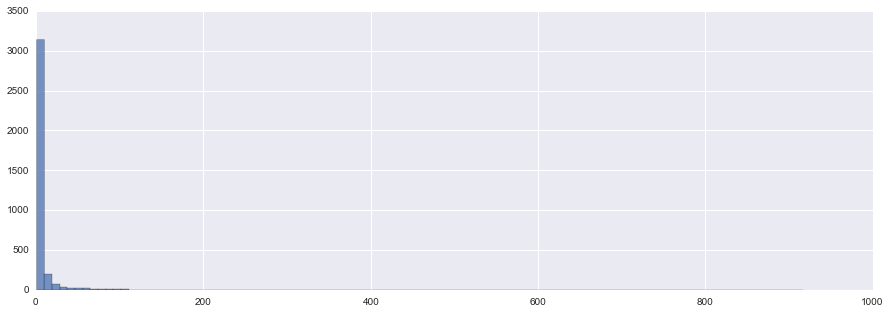

In [412]:
density_plot = cnt_hashtags['tag_frequency'].hist(bins=100, alpha=0.75)

As expected, it looks nothing like a bell curve and instead roughly approximates a power law distribution. Let's dig a bit deeper and run `value_counts()`. We see that 1,937 of the 3,580 tags are used only a single time. 

In [407]:
cnt_hashtags['tag_frequency'].value_counts()

1      1937
2       484
3       230
4       137
5       116
6        79
7        51
8        41
9        36
14       35
12       28
10       27
11       26
13       23
17       20
15       20
18       16
16       15
20       13
25       13
19       12
22       10
24        9
48        8
28        7
23        7
21        7
39        6
47        6
38        6
       ... 
149       1
163       1
185       1
197       1
231       1
241       1
275       1
281       1
67        1
61        1
59        1
55        1
116       1
128       1
142       1
166       1
168       1
214       1
224       1
228       1
272       1
404       1
438       1
582       1
341       1
35        1
45        1
49        1
51        1
704       1
dtype: int64

<br>We can calculate manually the percentage of tags that are tweeted only once -- it's 54.1%. That means only 46% of all tags sent in 2013 are ever used more than one time.

In [409]:
from __future__ import division
1937/3580

0.5410614525139665

<br>Alternatively, to get the percentages we can just use the `normalize` option in `value_counts()`

In [410]:
cnt_hashtags['tag_frequency'].value_counts(normalize=True)

1      0.541061
2      0.135196
3      0.064246
4      0.038268
5      0.032402
6      0.022067
7      0.014246
8      0.011453
9      0.010056
14     0.009777
12     0.007821
10     0.007542
11     0.007263
13     0.006425
17     0.005587
15     0.005587
18     0.004469
16     0.004190
20     0.003631
25     0.003631
19     0.003352
22     0.002793
24     0.002514
48     0.002235
28     0.001955
23     0.001955
21     0.001955
39     0.001676
47     0.001676
38     0.001676
         ...   
149    0.000279
163    0.000279
185    0.000279
197    0.000279
231    0.000279
241    0.000279
275    0.000279
281    0.000279
67     0.000279
61     0.000279
59     0.000279
55     0.000279
116    0.000279
128    0.000279
142    0.000279
166    0.000279
168    0.000279
214    0.000279
224    0.000279
228    0.000279
272    0.000279
404    0.000279
438    0.000279
582    0.000279
341    0.000279
35     0.000279
45     0.000279
49     0.000279
51     0.000279
704    0.000279
dtype: float64

<br>Let's now turn our attention to the <i>most popular</i> tags. As a side note, our new dataframe is already sorted in descending order of frequency. This makes it relatively painless to choose a range of tags. For instance, we can use Python's slicing capabilities to plot just the 90th to 100th most-popular hashtags.

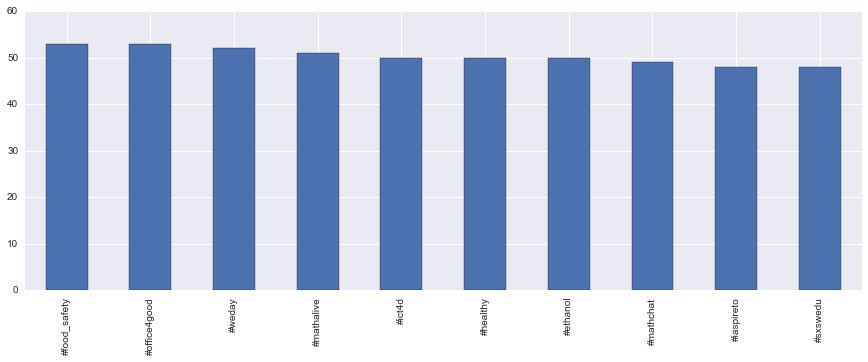

In [411]:
cnt_hashtags['tag_frequency'][90:100].plot(kind='bar')

<br>We don't really want to do that, though. Let's look at the 25 most frequently used tags instead.

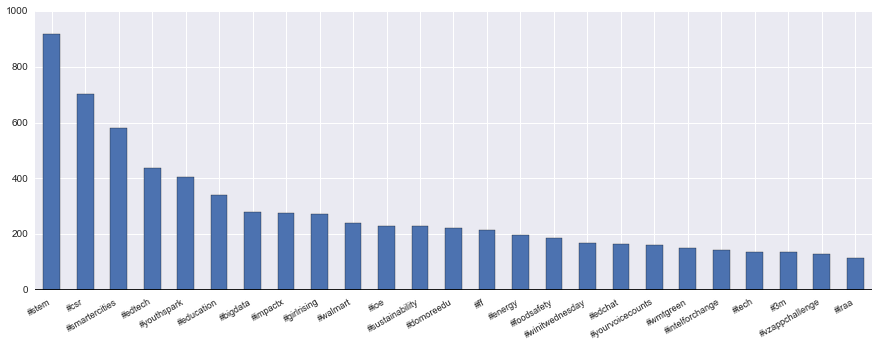

In [446]:
cnt_hashtags['tag_frequency'][:25].plot(kind='bar')
axhline(0, color='k')
#title('Top 25 hashtags')
xticks(fontsize = 9,rotation = 30, ha='right')
savefig('25 most popular tags.png', bbox_inches='tight', dpi=300, format='png')
show()

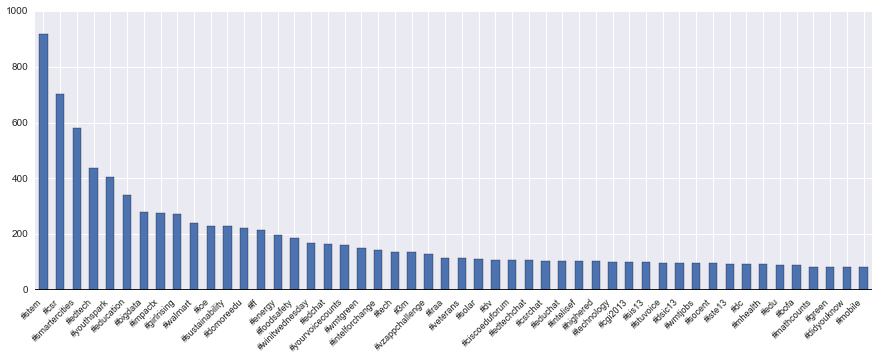

In [447]:
cnt_hashtags['tag_frequency'].head(50).plot(kind='bar')
axhline(0, color='k')
#title('Top 50 hashtags')
xticks(fontsize = 9,rotation = 45, ha='right')
savefig('50 most popular tags.png', bbox_inches='tight', dpi=300, format='png')
show()

## Generate Tag Clouds

### Create Text Document of all hashtags for creating Tag Cloud

Now what we're going to do is create a <i>tag cloud</i>, a special form of word cloud. Word clouds are generally not all that helpful given how the words are taken out of their context (sentences). In certain settings, however, they do provide meaningful information. Hashtags are one of those contexts — they are <i>meant</i> to be single words. The tags denote ideas or topics or places. By examining the hashtags, we can thus gain an appreciation for the most salient topics the Fortune 200 companies are tweeting about in their CSR accounts.

What we need to do is to create a single text file that contains every hashtag used. Similarly to with our tag frequencies loop, we start by creating an empty list, called `all_tags`. We then again loop over every row in the dataframe, and if the `entities_hashtags` column is not empty, we assign the lowercase version of the text (the string of hashtags) to a variable called `tags`. We then remove the commas from the text and append the tags to our list. So far, this is quite similar to what we did above to generate our counts of hashtags. There is one big difference: we do not need to split the text in our `entities_hashtags` column up into individual hashtags. Instead, for the word cloud we are just creating an entire single string document that contains every hashtag used in our dataset. So what we do is convert our list `all_tags` into a string via the `' '.join(all_tags)` command. This tells Python to join every item in our list together -- with a space in between each tag -- into a single combined text string called `all_hashtags`. In a final step, we save a copy of this text file to our computer. This will come in handy if you wish to create your tag cloud on an external site.

In [56]:
all_tags = []
for index, row in df_original.iterrows():    
        if pd.notnull(row['entities_hashtags']):
            print row['entities_hashtags'], type(row['entities_hashtags'])
            tags = row['entities_hashtags'].lower()
            print tags
        else:
            tags = ''
            print row['entities_hashtags'], " -- No hashtags in tweet"
        tags = tags.replace(',','')
        all_tags.append(tags) 
        
all_hashtags = ' '.join(all_tags)
out=file('all_text_HASHTAGS.txt','w')
out.write(all_hashtags)   

nan  -- No hashtags in tweet
vacuna, neumonía <type 'str'>
vacuna, neumonía
lazos13 <type 'str'>
lazos13
IntelSTS, WHScienceFair <type 'str'>
intelsts, whsciencefair
CGI2013 <type 'str'>
cgi2013
CleanEnergy <type 'str'>
cleanenergy
nan  -- No hashtags in tweet
nan  -- No hashtags in tweet
nan  -- No hashtags in tweet
Montpellier, SmarterCities <type 'str'>
montpellier, smartercities
FF <type 'str'>
ff
nan  -- No hashtags in tweet
HungryKate <type 'str'>
hungrykate
nan  -- No hashtags in tweet
nan  -- No hashtags in tweet
nan  -- No hashtags in tweet
PiDay <type 'str'>
piday
nan  -- No hashtags in tweet
nan  -- No hashtags in tweet
nan  -- No hashtags in tweet
LegacyofGood <type 'str'>
legacyofgood
DSIC13 <type 'str'>
dsic13
Bigdata, DigitalDelta, SmartCityExpo <type 'str'>
bigdata, digitaldelta, smartcityexpo
nan  -- No hashtags in tweet
IOT <type 'str'>
iot
STEM <type 'str'>
stem
nan  -- No hashtags in tweet
WomenWeb <type 'str'>
womenweb
worldtoiletday <type 'str'>
worldtoiletday
nan

In [57]:
print all_hashtags

 vacuna neumonía lazos13 intelsts whsciencefair cgi2013 cleanenergy    montpellier smartercities ff  hungrykate    piday    legacyofgood dsic13 bigdata digitaldelta smartcityexpo  iot stem  womenweb worldtoiletday   fortunegreen helpbridge  ioe iot newyearsresolution intelsts innovation mhealth  telepresence memorialday    osc       csr wintitwednesday  education tech  genx fuel efficiency cisco networking academy fb netacad netacad500k menopausia  dc lraa    ne  walmart winitwednesday work ethanol rfs walmartdc smartercities china  awesome edtechchat pbsdlday inventosmexicanos  stem    walmart health lives   vzappchallenge internetessentials  stem    infographic impactx ata2013 healthit vils ccday apps vzappchallenge csedweek hourofcode intelforchange  videoconference  office4good iste13   girlrising   girlrising ultrabooks   mars500 mars evs c4gchat nptech npdata classroom ciscoeduforum  girlrising edu youthspark  smartercities csr 3blchat    stellartweeps earlyff   backtoschool sis1

### Create Tag Cloud

Lots of people have contributed to making Python a success. Often people will make public a package designed to fulfill a certain purpose. If something is available for your specific needs you may as well use it rather than reinventing the wheel. So, first I'll show you how to use Andreas Mueller's `WordCloud` package to visualize our tag cloud. Assuming you're using Anaconda Python, open up your Terminal and run <i>pip install wordcloud</i> -- https://github.com/amueller/word_cloud

Then import the package`

In [59]:
from wordcloud import WordCloud

<br>At that point it's pretty simple to generate a tag cloud from our `all_hashtags` variable. 

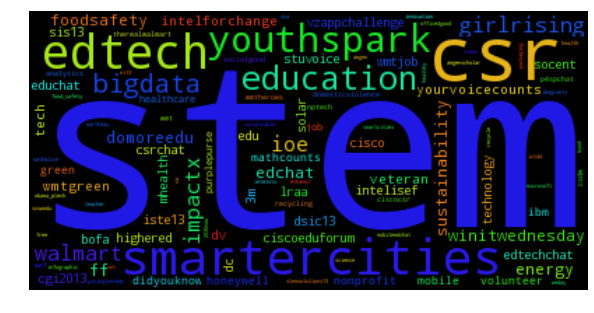

In [60]:
wordcloud = WordCloud().generate(all_hashtags)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Customize the Tag Cloud

Most packages include a multitude of options. Use the question mark to see a description of the available options.

In [ ]:
WordCloud?

<br>Sebastian Raschka also has a tutorial that explores some of the options in Mueller's WordCloud package. Sebastian's code requires we install PIL. In your terminal run <i>conda install pil</i> -- http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html

Sebastian also uses a custom font. Try to download and install a custom font; e.g., http://ff.static.1001fonts.net/c/a/cabin-sketch.bold.ttf  For more about fonts on a Mac see this: https://support.apple.com/en-us/HT201722  Note the location of the downloaded font and let's use it in a new version of the word cloud

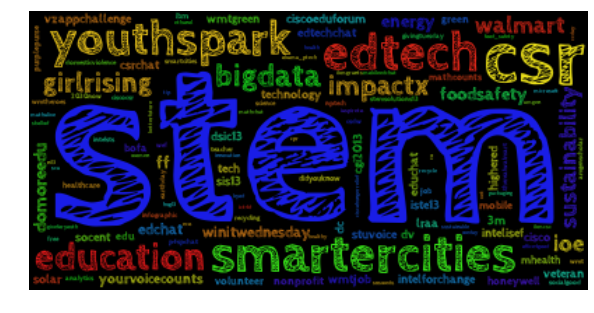

In [63]:
wordcloud = WordCloud(font_path='/Users/gregorysaxton/Library/Fonts/cabin-sketch.bold.ttf',
                      background_color='black',
                      #width=1800,
                      #height=1400
                     ).generate(all_hashtags)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('CSR tag cloud.png', dpi=300)
plt.show()

<br>Now let's try it with a white background.

(-0.5, 5599.5, 2799.5, -0.5)

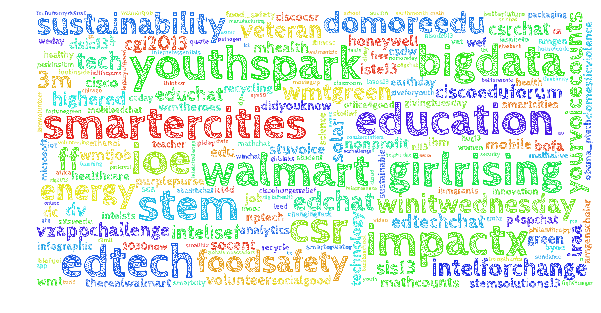

In [135]:
wordcloud = WordCloud(font_path='/Users/gregorysaxton/Library/Fonts/cabin-sketch.bold.ttf',
                      background_color='white',
                      width=5600,
                      height=2800
                     ).generate(all_hashtags)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<br>And finally, with a different custom font.

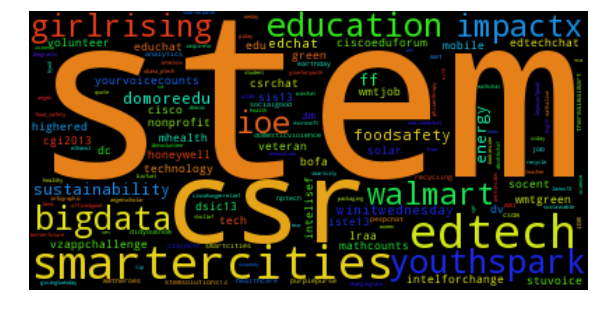

In [138]:
wordcloud = WordCloud(font_path='/Users/gregorysaxton/Library/Fonts/DroidSansMono.ttf',
                      background_color='black',
                     ).generate(all_hashtags)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Using Wordle

The `WordCloud` package is excellent for quickly generating a quality tag cloud. However, for more customization of your tag cloud, an alternative is to copy + paste the contents of our document <i>all_text_HASHTAGS.txt</i> to http://www.wordle.net. Note that on my Mac at least, you can't use Chrome or Firefox. Safari works.

Note that I generally have to take a screenshot to capture word clouds on Wordle. The image below is a screen shot of a first word cloud I created: The font is "Telephoto," layout is "Mostly Horizontal," and color is "Ghostly." 

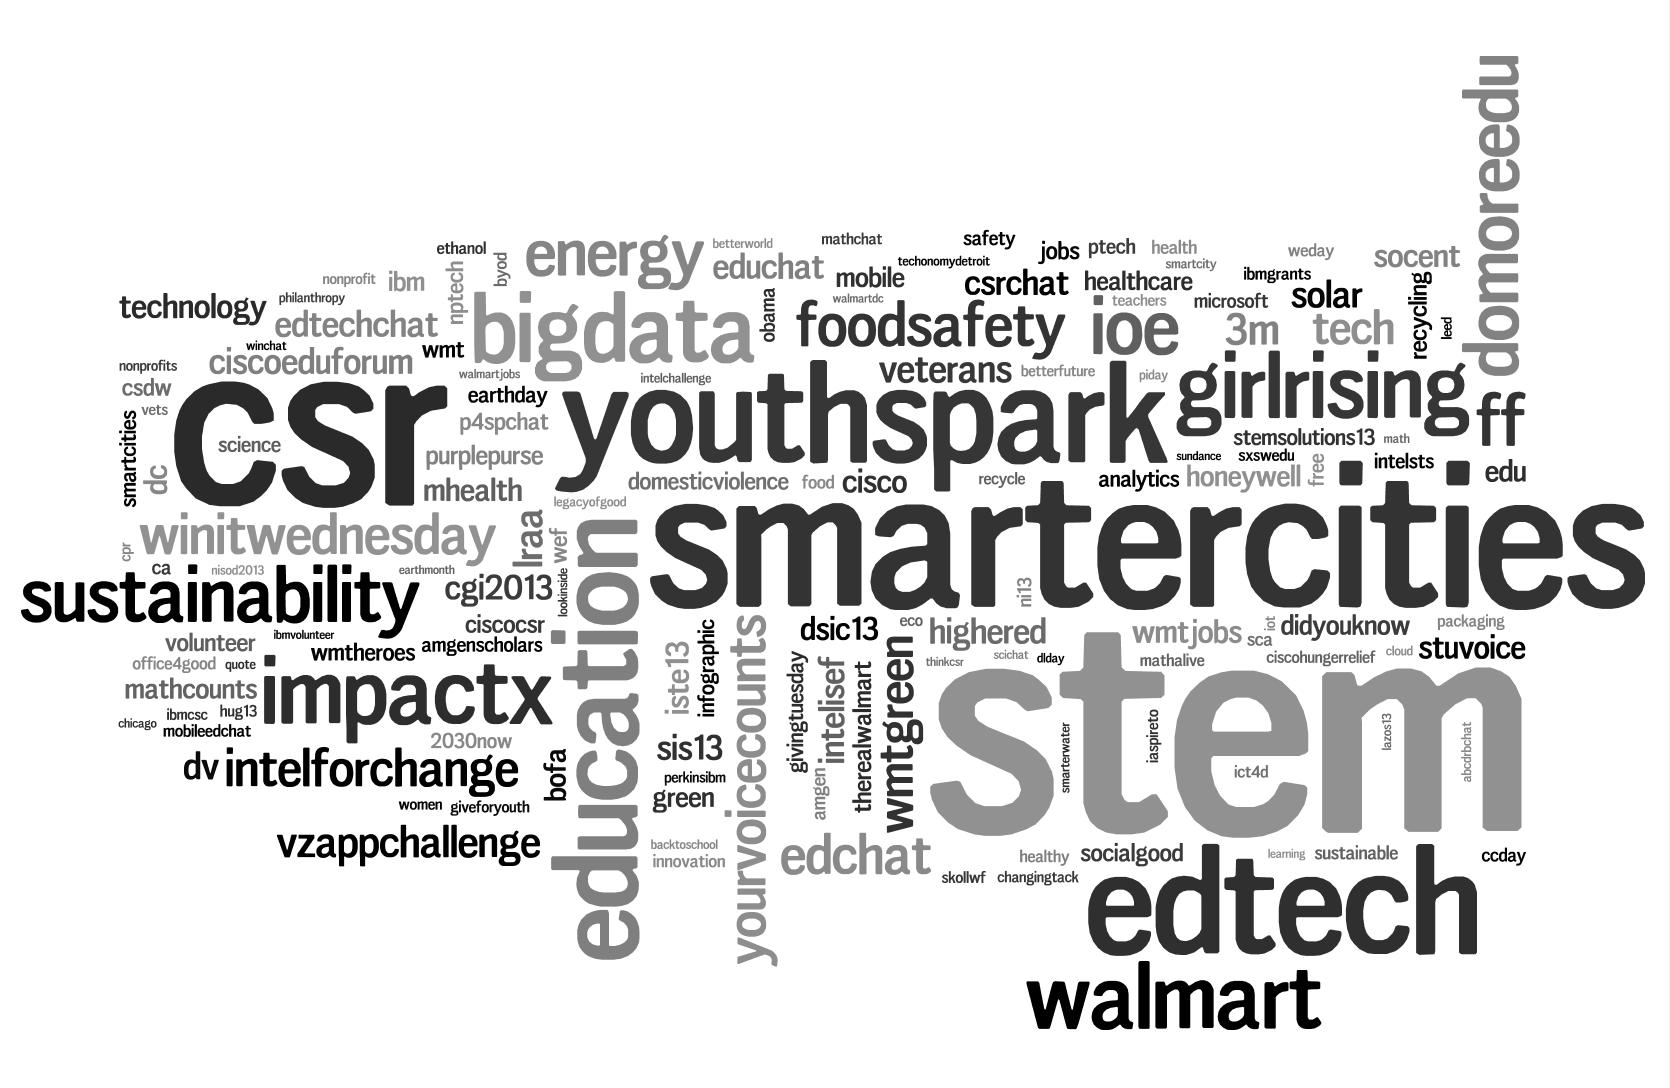

In [163]:
from IPython.display import Image
Image(width=800, filename='CSR tag cloud - wordle.png') 

<br><br>And this one uses the font "Kenyan Coffee"

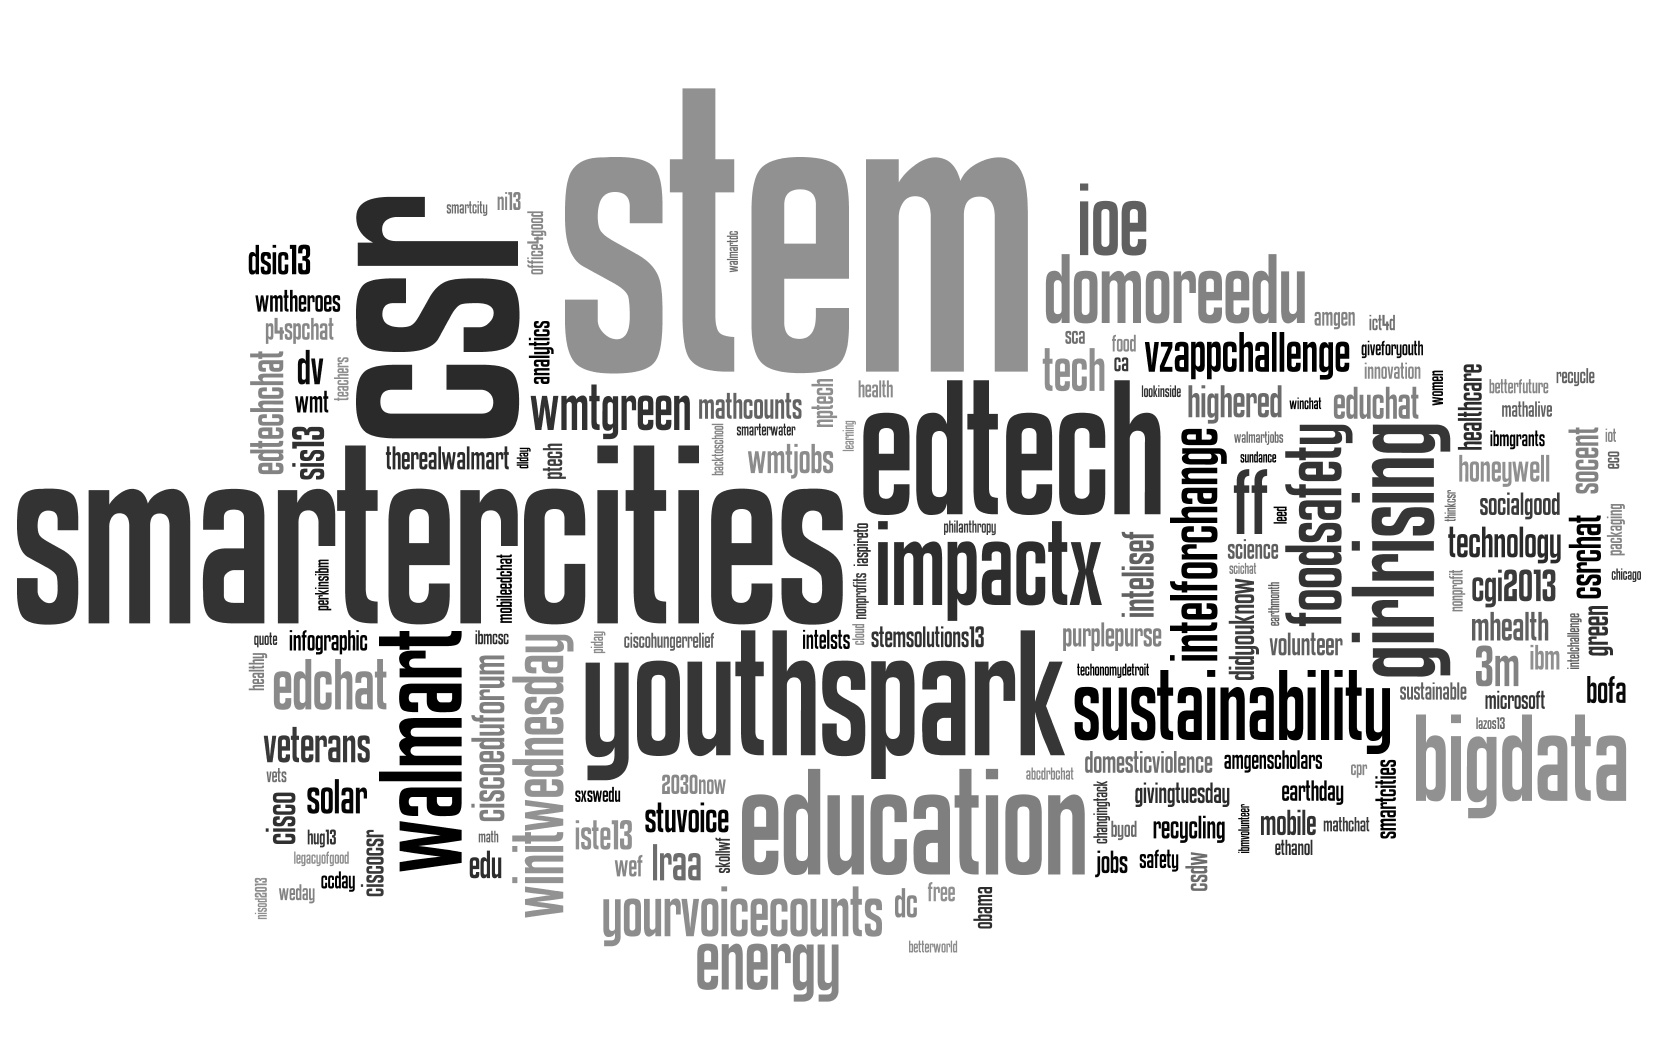

In [164]:
from IPython.display import Image
Image(width=800, filename='CSR tag cloud (wordle - Kenyan Coffee).png') 

<br>In this tutorial we have covered how to generate a frequency count for each of the hashtags included in our dataframe and to plot the results. We have also covered how to generate and explore summary statistics for a variable. Along the way, you have been introduced to lists and functions and for loops, among other things. Finally, we have covered how to create tag clouds. In the next tutorials we will cover how to create new variables and how to produce a formatted summary statistics table as would be used in a typical social scientific publication.

<br>

For more Notebooks as well as additional Python and Big Data tutorials, please visit http://social-metrics.org or follow me on Twitter <a href='https://twitter.com/gregorysaxton'>@gregorysaxton</a>